In [36]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv("Mushroom.csv")
df.head()

,Class,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,...,Ssbr,Scar,Scbr,Veil-type,Veil-color,Ring-number,Ring-type,spc,Polpulation,Habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [38]:
df.dtypes

Class              object
Cap-shape          object
Cap-surface        object
Cap-color          object
Bruises            object
Odor               object
Gill-attachment    object
Gill-spacing       object
Gill-size          object
Gill-color         object
Stalk-shape        object
Stalk-root         object
Ssar               object
Ssbr               object
Scar               object
Scbr               object
Veil-type          object
Veil-color         object
Ring-number        object
Ring-type          object
spc                object
Polpulation        object
Habitat            object
dtype: object

In [39]:
df.describe()

,Class,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,...,Ssbr,Scar,Scbr,Veil-type,Veil-color,Ring-number,Ring-type,spc,Polpulation,Habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [40]:
df.shape

(8124, 23)

In [41]:
# Checking for missing values

df.isnull().sum()

Class              0
Cap-shape          0
Cap-surface        0
Cap-color          0
Bruises            0
Odor               0
Gill-attachment    0
Gill-spacing       0
Gill-size          0
Gill-color         0
Stalk-shape        0
Stalk-root         0
Ssar               0
Ssbr               0
Scar               0
Scbr               0
Veil-type          0
Veil-color         0
Ring-number        0
Ring-type          0
spc                0
Polpulation        0
Habitat            0
dtype: int64

In [42]:
# There are no null values, but attribute 11 consists of ? entries, replacing them with mode

df['Stalk-shape'] = df['Stalk-shape'].replace(['?'],df['Stalk-shape'].mode()) 

In [43]:
# Converting categorical to numerical data
# using label encoder for the entire dataframe

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 

df = df.apply(label_encoder.fit_transform)
df.head()

,Class,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,...,Ssbr,Scar,Scbr,Veil-type,Veil-color,Ring-number,Ring-type,spc,Polpulation,Habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [44]:
# PCA
x = df.iloc[:,1:]
x.head()

,Cap-shape,Cap-surface,Cap-color,Bruises,Odor,Gill-attachment,Gill-spacing,Gill-size,Gill-color,Stalk-shape,...,Ssbr,Scar,Scbr,Veil-type,Veil-color,Ring-number,Ring-type,spc,Polpulation,Habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
x=pca.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.228207,-0.345472,-1.424425,-1.246722,2.088737,2.645915,-1.032036,3.643589,-0.925812,0.366808
1,-1.936561,4.796912,-3.511668,-1.245720,0.551144,-0.283909,2.550317,-0.617764,0.232131,0.075075
2,-1.654173,2.464362,-3.880827,1.222505,1.043965,-2.052608,-2.190863,0.667470,-0.188417,0.331206
3,-1.252026,1.679664,-3.565488,0.586997,0.679516,2.792790,-0.396476,4.161473,-1.013877,-0.498926
4,1.581220,-1.002043,-1.255760,-1.970625,0.070293,3.301132,-1.258234,-2.004355,0.602214,-1.342796


In [46]:
y = df.iloc[:,0]
y = pd.DataFrame(y)
y.head()

,Class
0,1
1,0
2,0
3,1
4,0


In [47]:
df = pd.concat([x,y],axis=1)
df.head()

,0,1,2,3,4,5,6,7,8,9,Class
0,0.228207,-0.345472,-1.424425,-1.246722,2.088737,2.645915,-1.032036,3.643589,-0.925812,0.366808,1
1,-1.936561,4.796912,-3.511668,-1.245720,0.551144,-0.283909,2.550317,-0.617764,0.232131,0.075075,0
2,-1.654173,2.464362,-3.880827,1.222505,1.043965,-2.052608,-2.190863,0.667470,-0.188417,0.331206,0
3,-1.252026,1.679664,-3.565488,0.586997,0.679516,2.792790,-0.396476,4.161473,-1.013877,-0.498926,1
4,1.581220,-1.002043,-1.255760,-1.970625,0.070293,3.301132,-1.258234,-2.004355,0.602214,-1.342796,0


In [48]:
#Correlation

df.corr()

,0,1,2,3,4,5,6,7,8,9,Class
0,1.000000e+00,1.080020e-16,-3.472630e-16,2.958158e-17,6.734404e-17,1.051293e-16,5.636767e-16,-7.718171e-17,2.223184e-17,1.460974e-16,0.460047
1,1.080020e-16,1.000000e+00,-3.914224e-16,-8.518304e-17,-1.805248e-16,-1.835919e-16,7.853431e-17,-3.614803e-18,1.573626e-17,-6.418747e-17,0.327916
2,-3.472630e-16,-3.914224e-16,1.000000e+00,-7.088030e-17,-7.740155e-17,1.284320e-16,-3.949880e-16,-6.466286e-17,1.469875e-17,4.422953e-16,0.250011
3,2.958158e-17,-8.518304e-17,-7.088030e-17,1.000000e+00,1.334559e-16,1.227765e-16,-3.619104e-16,-1.587318e-16,2.534981e-16,-1.473395e-17,0.049390
4,6.734404e-17,-1.805248e-16,-7.740155e-17,1.334559e-16,1.000000e+00,-5.593742e-16,2.881469e-16,1.645087e-16,-1.394029e-16,1.421498e-17,0.102041
5,1.051293e-16,-1.835919e-16,1.284320e-16,1.227765e-16,-5.593742e-16,1.000000e+00,-8.413891e-16,2.736760e-16,3.305197e-16,2.721385e-16,-0.037882
6,5.636767e-16,7.853431e-17,-3.949880e-16,-3.619104e-16,2.881469e-16,-8.413891e-16,1.000000e+00,5.175718e-16,6.456178e-17,1.266997e-16,0.119610
7,-7.718171e-17,-3.614803e-18,-6.466286e-17,-1.587318e-16,1.645087e-16,2.736760e-16,5.175718e-16,1.000000e+00,9.241569e-17,6.522146e-17,0.038853
8,2.223184e-17,1.573626e-17,1.469875e-17,2.534981e-16,-1.394029e-16,3.305197e-16,6.456178e-17,9.241569e-17,1.000000e+00,-9.763984e-17,-0.017669
9,1.460974e-16,-6.418747e-17,4.422953e-16,-1.473395e-17,1.421498e-17,2.721385e-16,1.266997e-16,6.522146e-17,-9.763984e-17,1.000000e+00,-0.052976


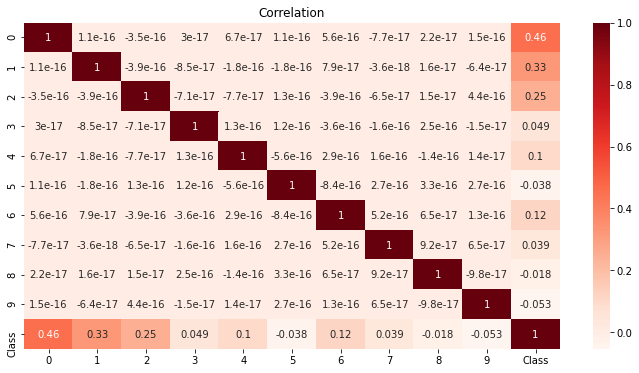

In [49]:
# Visualizing correlation using heatmap

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title("Correlation")
sns.heatmap(df.corr(),annot=True,cmap='Reds')

In [50]:
# dropping weakly -ve correlated columns

df.drop(5,axis=1,inplace=True)
df.drop(8,axis=1,inplace=True)
df.drop(9,axis=1,inplace=True)
df.head()

,0,1,2,3,4,6,7,Class
0,0.228207,-0.345472,-1.424425,-1.246722,2.088737,-1.032036,3.643589,1
1,-1.936561,4.796912,-3.511668,-1.245720,0.551144,2.550317,-0.617764,0
2,-1.654173,2.464362,-3.880827,1.222505,1.043965,-2.190863,0.667470,0
3,-1.252026,1.679664,-3.565488,0.586997,0.679516,-0.396476,4.161473,1
4,1.581220,-1.002043,-1.255760,-1.970625,0.070293,-1.258234,-2.004355,0


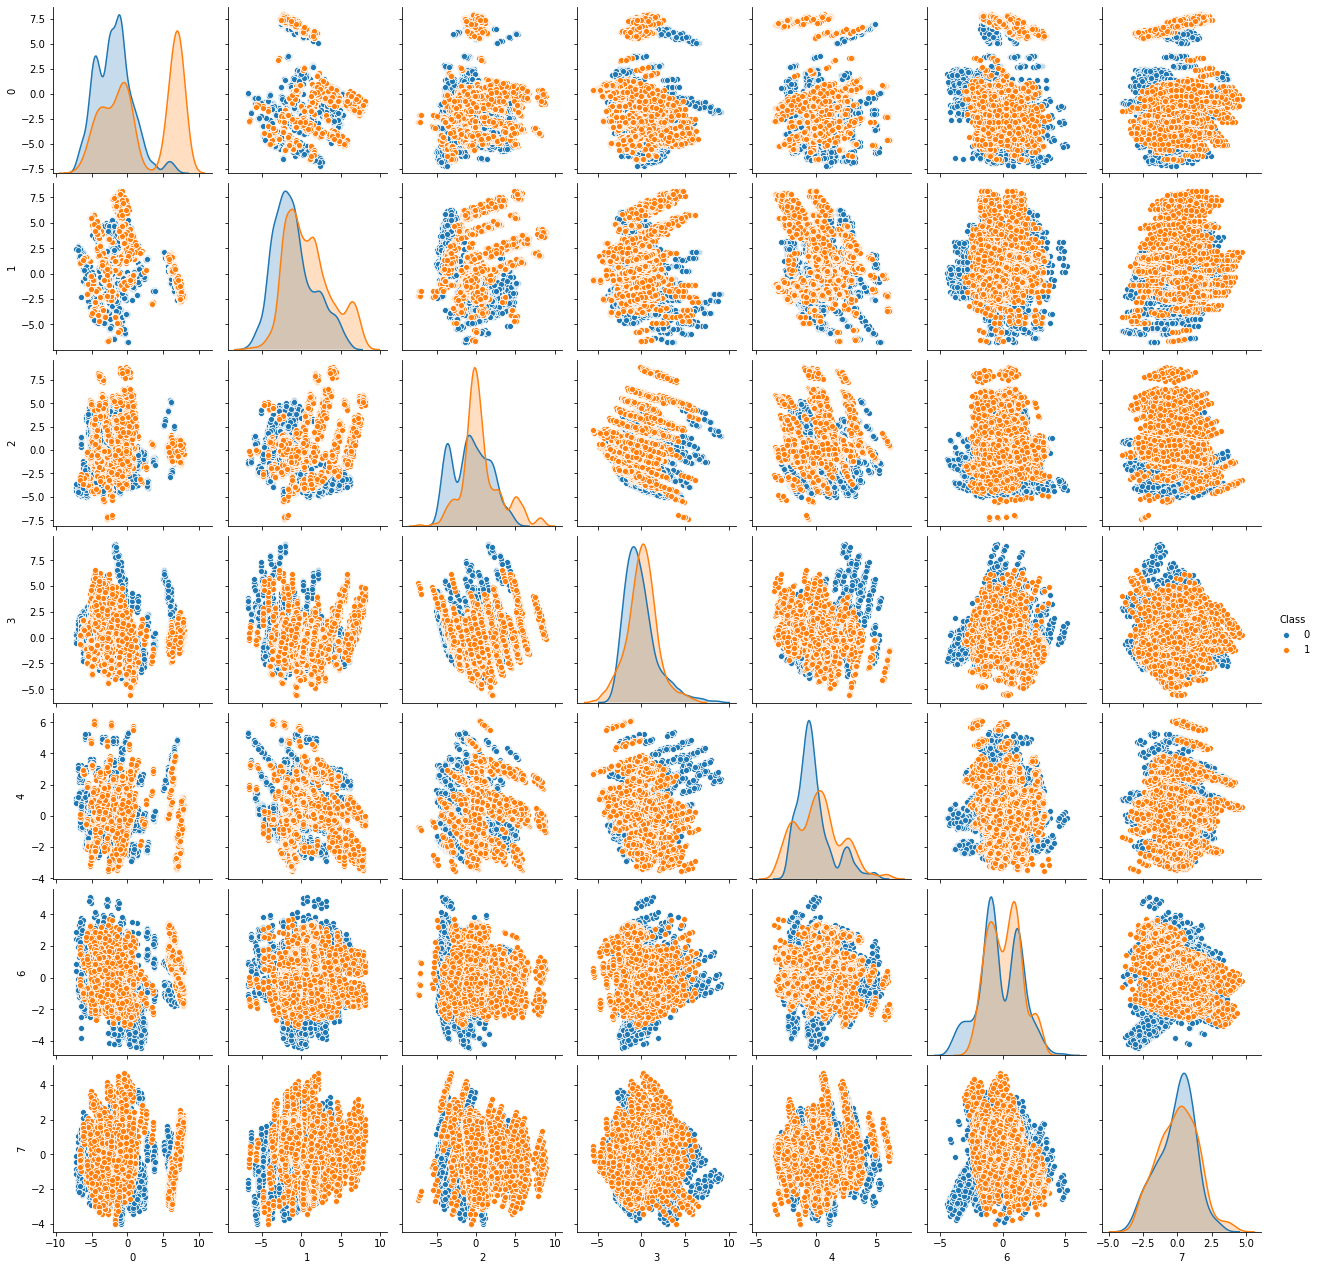

In [51]:
sns.pairplot(df,hue="Class")
# high overlapping

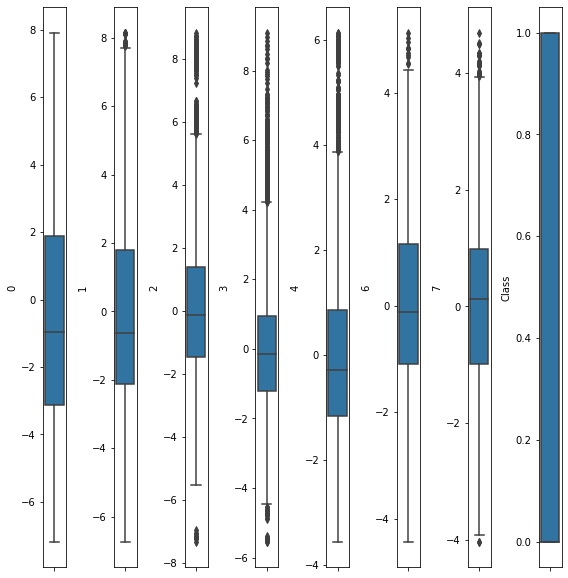

In [52]:
# Checking for outliers using boxplot

collist = df.columns.values
ncol = 8
nrows = 5

plt.figure(figsize=(ncol,5*ncol))
for i in range(len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],orient = "v")
    plt.tight_layout()
    

In [53]:
# Removing outliers

from scipy.stats import zscore
z=np.abs(zscore(df))
df_new=df[(z<3).all(axis=1)]
df_new.head()

,0,1,2,3,4,6,7,Class
0,0.228207,-0.345472,-1.424425,-1.246722,2.088737,-1.032036,3.643589,1
1,-1.936561,4.796912,-3.511668,-1.245720,0.551144,2.550317,-0.617764,0
2,-1.654173,2.464362,-3.880827,1.222505,1.043965,-2.190863,0.667470,0
3,-1.252026,1.679664,-3.565488,0.586997,0.679516,-0.396476,4.161473,1
4,1.581220,-1.002043,-1.255760,-1.970625,0.070293,-1.258234,-2.004355,0


In [54]:
df.shape

(8124, 8)

In [55]:
df_new.shape

(7892, 8)

In [56]:
df = df_new

In [57]:
# Skewness

df.skew()

0        0.612795
1        0.598083
2        0.273925
3        0.465087
4        0.633142
6       -0.088277
7       -0.131555
Class    0.088293
dtype: float64

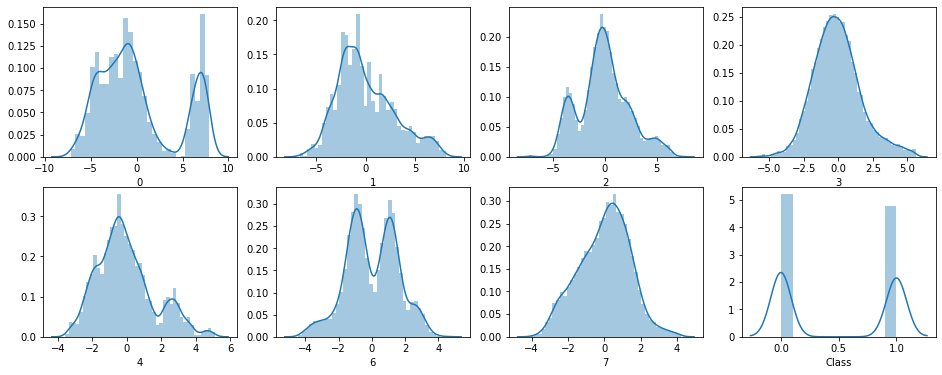

In [58]:
# Visualizing skewness

collist = df.columns.values
ncol = 4
nrow= 5

plt.figure(figsize = (16,16))
plt.title("Skewness")
for i in range(len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df[collist[i]])

In [59]:
# Splitting independent variables and target

x = df.drop('Class',axis=1)
print(x.head())
y = df[['Class']]
print("\n")
print(y.head())

          0         1         2         3         4         6         7
0  0.228207 -0.345472 -1.424425 -1.246722  2.088737 -1.032036  3.643589
1 -1.936561  4.796912 -3.511668 -1.245720  0.551144  2.550317 -0.617764
2 -1.654173  2.464362 -3.880827  1.222505  1.043965 -2.190863  0.667470
3 -1.252026  1.679664 -3.565488  0.586997  0.679516 -0.396476  4.161473
4  1.581220 -1.002043 -1.255760 -1.970625  0.070293 -1.258234 -2.004355


   Class
0      1
1      0
2      0
3      1
4      0


In [60]:
# Using Standard scaler for uniform range in all columns

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6
0,0.043803,-0.123087,-0.557943,-0.678273,1.304866,-0.669336,2.579736
1,-0.472577,1.649497,-1.426255,-0.677691,0.374789,1.645251,-0.449290
2,-0.405217,0.845465,-1.579828,0.755502,0.672892,-1.418063,0.464271
3,-0.309289,0.574979,-1.448645,0.386490,0.452440,-0.258696,2.947855
4,0.366549,-0.349408,-0.487777,-1.098612,0.083926,-0.815484,-1.434897


In [61]:
x.skew()

0    0.612795
1    0.598083
2    0.273925
3    0.465087
4    0.633142
5   -0.088277
6   -0.131555
dtype: float64

In [62]:
# Splitting into training and testing data

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=62)

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [65]:
model = [LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]

for m in model:
    m.fit(x_train,y_train)
    print(m.score(x_train,y_train))
    predm=m.predict(x_test)
    print("accuracy score of", m,"is")
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")

0.8306668778710598
accuracy score of LogisticRegression() is
0.8366054464851171
[[697 110]
 [148 624]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       807
           1       0.85      0.81      0.83       772

    accuracy                           0.84      1579
   macro avg       0.84      0.84      0.84      1579
weighted avg       0.84      0.84      0.84      1579



0.834310153651196
accuracy score of GaussianNB() is
0.8416719442685244
[[729  78]
 [172 600]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       807
           1       0.88      0.78      0.83       772

    accuracy                           0.84      1579
   macro avg       0.85      0.84      0.84      1579
weighted avg       0.85      0.84      0.84      1579



0.9912878187866307
accuracy score of SVC() is
0.9905003166561115
[[804   3]
 [ 12 760]]
              precision    recall  f1-score   support

  

In [66]:
# Ensemble techniques

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predrf= rf.predict(x_test)
print("accuracy score",accuracy_score(y_test,predrf))
print("confusion matrix",confusion_matrix(y_test,predrf))
print("classification_report \n",classification_report(y_test,predrf))

accuracy score 0.9974667511082964
confusion matrix [[807   0]
 [  4 768]]
classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       807
           1       1.00      0.99      1.00       772

    accuracy                           1.00      1579
   macro avg       1.00      1.00      1.00      1579
weighted avg       1.00      1.00      1.00      1579



In [67]:
#cross_val_score

from sklearn.model_selection import cross_val_score

model = [LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),rf]

for m in model:
    print("For",m ,cross_val_score(m,x,y,scoring= "accuracy",cv=10).mean())

For LogisticRegression() 0.811507917408673
For GaussianNB() 0.8001195231907078
For SVC() 0.9361604979865555
For DecisionTreeClassifier() 0.9433882016973897
For KNeighborsClassifier() 0.9498496735171905
For RandomForestClassifier() 0.944147855802089


In [68]:
# Saving the model - rf

import joblib

joblib.dump(rf,"rf_mushroom.pkl")

['rf_mushroom.pkl']